#  Text Generation using LSTMs

### Generating News headlines


import the required libraries:

In [18]:
# keras module for building LSTM
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.models import Sequential
import keras.utils as ku


import tensorflow as tf
tf.random.set_seed(2)
from numpy.random import seed
seed(1)

#data manupulation libraries
import pandas as pd
import numpy as np
import string, os

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

## 2. Load the dataset

Load the dataset of news headlines

In [19]:
# from google.colab import drive
# drive.mount('/content/drive')


In [20]:
# import os
# os.chdir('/content/drive/MyDrive/')

In [21]:
# !pwd

In [22]:
curr_dir = './archive/'
all_headlines = []
for filename in os.listdir(curr_dir):
    if 'Articles' in filename:
        article_df = pd.read_csv(curr_dir + filename)
        all_headlines.extend(list(article_df.headline.values))
        break

all_headlines = [h for h in all_headlines if h != "Unknown"]
len(all_headlines)

831

## 3. Dataset preparation/cleaning

In [6]:
def clean_text(txt):
    txt = "".join(v for v in txt if v not in string.punctuation).lower()
    txt = txt.encode("utf8").decode("ascii",'ignore')
    return txt

corpus = [clean_text(x) for x in all_headlines]
corpus[:10]

['finding an expansive view  of a forgotten people in niger',
 'and now  the dreaded trump curse',
 'venezuelas descent into dictatorship',
 'stain permeates basketball blue blood',
 'taking things for granted',
 'the caged beast awakens',
 'an everunfolding story',
 'oreilly thrives as settlements add up',
 'mouse infestation',
 'divide in gop now threatens trump tax plan']

### Creating Sequence of N-gram Tokens 


In [7]:
tokenizer = Tokenizer()

def get_sequence_of_tokens(corpus):
    ## tokenization
    tokenizer.fit_on_texts(corpus)
    total_words = len(tokenizer.word_index) + 1

    ## convert data to sequence of tokens
    input_sequences = []
    for line in corpus:
        token_list = tokenizer.texts_to_sequences([line])[0]
        for i in range(1, len(token_list)):
            n_gram_sequence = token_list[:i+1]
            input_sequences.append(n_gram_sequence)
    return input_sequences, total_words

inp_sequences, total_words = get_sequence_of_tokens(corpus)
inp_sequences[:10]

[[169, 17],
 [169, 17, 665],
 [169, 17, 665, 367],
 [169, 17, 665, 367, 4],
 [169, 17, 665, 367, 4, 2],
 [169, 17, 665, 367, 4, 2, 666],
 [169, 17, 665, 367, 4, 2, 666, 170],
 [169, 17, 665, 367, 4, 2, 666, 170, 5],
 [169, 17, 665, 367, 4, 2, 666, 170, 5, 667],
 [6, 80]]

Here the increasing size of the list represents the ngram phrases generated from the input data. where every integer corresponds to the index of a particular word in the complete vocabulary of words present in the text. For example

**Headline:** i stand  with the shedevils  
**Ngrams:** | **Sequence of Tokens**

{i stand --> [30, 507]}  
{i stand with --> [30, 507, 11]}  
{i stand with the --> [30, 507, 11, 1]}  
{i stand with the shedevils --> [30, 507, 11, 1, 975]}  
 



### Padding the Sequences and obtain Variables : Predictors and Target

 


Headline:  they are learning data science


 PREDICTORS -->          LABEL  
they -->                     are  
they are -->                 learning  
they are learning -->        data  
they are learning data -->   science  


In [23]:
def generate_padded_sequences(input_sequences):
    max_sequence_len = max([len(x) for x in input_sequences])
    input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

    predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
    label = ku.to_categorical(label, num_classes=total_words)
    return predictors, label, max_sequence_len

predictors, label, max_sequence_len = generate_padded_sequences(inp_sequences)

Perfect, now we can obtain the input vector X and the label vector Y which can be used for the training purposes. Recent experiments have shown that recurrent neural networks have shown a good performance in sequence to sequence learning and text data applications. Lets look at them in brief.

## 4. LSTMs for Text Generation

![](https://static.packt-cdn.com/products/9781788997096/graphics/assets/19f1c280-e0c8-475d-82e1-c2bd83f4cf7b.png)

 

In [24]:
def create_model(max_sequence_len, total_words):
    input_len = max_sequence_len - 1
    model = Sequential()

    # Add Input Embedding Layer
    model.add(Embedding(total_words, 10, input_length=input_len))

    # Add Hidden Layer 1 - LSTM Layer
    model.add(LSTM(100))
    model.add(Dropout(0.1))

    # Add Output Layer
    model.add(Dense(total_words, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam')

    return model

model = create_model(max_sequence_len, total_words)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 18, 10)            24220     
                                                                 
 lstm_1 (LSTM)               (None, 100)               44400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 2422)              244622    
                                                                 
Total params: 313242 (1.19 MB)
Trainable params: 313242 (1.19 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# from google.colab import drive
# drive.mount('/content/drive')

Lets train our model now

In [11]:
model.fit(predictors, label, epochs=100, verbose=5)

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

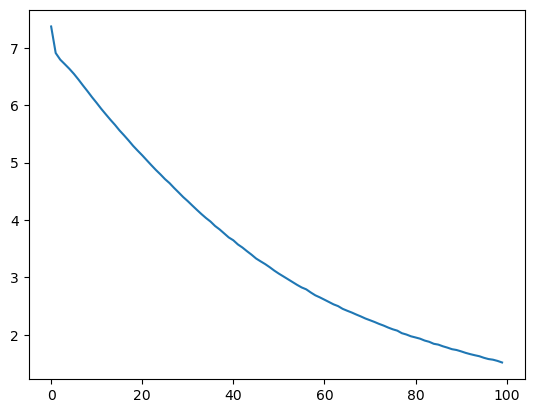

In [14]:
import matplotlib.pyplot as plt
loss=model.history.history['loss']
plt.plot(loss) 

In [11]:
# import keras
# model.save('my_trained_model.h5')


In [25]:
loaded_model = keras.models.load_model('my_trained_model.h5')

## 5. Generating the text

Great, our model architecture is now ready and we can train it using our data. Next lets write the function to predict the next word based on the input words (or seed text). We will first tokenize the seed text, pad the sequences and pass into the trained model to get predicted word. The multiple predicted words can be appended together to get predicted sequence.


In [13]:
def generate_text(seed_text, next_words, loaded_model, max_sequence_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted_probs = loaded_model.predict(token_list, verbose=0)[0]  # Get the predicted word probabilities

        # Find the index of the word with the highest probability
        predicted_index = np.argmax(predicted_probs)

        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted_index:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text.title()


In [15]:
#  Generate news headlines
generated_headlines = []
for _ in range(5):
    generated_headlines.append(generate_text("united states", 5, model, max_sequence_len))

# Reference headlines (ground truth) - Replace with your reference headlines
reference_headlines = ["Reference headline 1", "Reference headline 2", "Reference headline 3", "Reference headline 4", "Reference headline 5"]


In [22]:
 
import numpy as np
import math

import nltk
nltk.download('punkt')
from nltk.translate.bleu_score import sentence_bleu

def calculate_perplexity(generated_headlines):
    tokenized_headlines = [nltk.word_tokenize(headline) for headline in generated_headlines]

    total_log_prob = 0
    total_words = 1  # Initialize total_words to 1 to avoid division by zero

    for headline in tokenized_headlines:
        for word in headline:
            if word in tokenizer.word_index:
                word_prob = word_count[word] / total_words
                total_log_prob += math.log2(word_prob)
            else:
                # Handle unknown words
                word_prob = 1 / total_words
                total_log_prob += math.log2(word_prob)
            total_words += 1

    perplexity = math.pow(2, -total_log_prob / total_words)

    return perplexity




# Function to calculate BLEU score
def calculate_bleu_score(generated_headlines, reference_headlines):
    tokenized_generated = [nltk.word_tokenize(headline) for headline in generated_headlines]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\skson\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [23]:
# perplexity = calculate_perplexity(generated_headlines, model)
perplexity = calculate_perplexity(generated_headlines)

# Calculate BLEU score
bleu_score = calculate_bleu_score(generated_headlines, reference_headlines)

# Print evaluation metrics
print("Perplexity:", perplexity)
print("BLEU Score:", bleu_score)

Perplexity: 12.927259368788766
BLEU Score: None


In [24]:
print (generate_text("united states", 5, loaded_model, max_sequence_len))
print (generate_text("preident trump", 4, loaded_model, max_sequence_len))
print (generate_text("donald trump", 4, loaded_model, max_sequence_len))
print (generate_text("india and china", 4, loaded_model, max_sequence_len))
print (generate_text("new york", 4, loaded_model, max_sequence_len))
print (generate_text("science and technology", 5, loaded_model, max_sequence_len))

United States Control Would Aid Wealthiest Avoid
Preident Trump Is Wimping As A
Donald Trump Plays Is Skip Care
India And China Legislate Have A Buddha
New York Today A Belated Budget
Science And Technology Be Mindful While Cleaning The
